# Problem 1

Recall that there are essentially three types of periodic orbits for iterated maps $f$.  They are based on a neighborhood of the corresponding fixed point $x$ for the map $f^n$ where $n$ is the order of $x$. We know that we can choose coordinates around this fixed point so that we can assume $ z= 0$. I.e. pick a disc around $z$ centered at $z$ and say that this is actually the unit disk. Then $f(0) = 0$ so that we have a Taylor series 
$$f(z) = \lambda z + a_2z^2 + \cdots$$ without constant terms since $f(0) = 0$. Here $\lambda = f'(0)$ is some complex number.

1. **Attracting** orbits, where $ 0 \le |\lambda| < 1$. 
2. **Repelling** orbits, where $|\lambda| > 1$
3. **Neutral** if $|\lambda| = 1$, or $\lambda$ lies on the unit circle. 

A key subtype of neutral orbits are **parabolic** orbits, where not only does $\lambda$ lie on the unit circle, but $\lambda^k = 1$ for some $k$ (i.e. $\lambda = (1)^{1/n}$). For this case we also assume that $f(z)$ has higher degree terms, i.e. we don't have $f(z) = \lambda(z)$. 

An important fact is that the sagemath command `julia_plot` doesn't require that $f$ be a quadratic polynomial. For this problem, use the function to plot the Julia plots near periodic orbits of each of these types, and understand what the structure of the Julia set is near these types of points. You can also plot iterates of points nearby to $0$ and explain at least why attracting and repelling periodic orbits have their names. Recall that we have already done the attracting case. 

-----
# Problem 2

Recall the Riemann mapping theorem, which says that any simply connected bounded domain $U$ in $\CC$ is conformally equivalent to the open unit disk. Remarkably, this is true even if the boundary of $U$ is some horribly non-differentiable curve. If we apply this to a neighborhood of $\infty$ which is the outside of the filled Julia set for some $f_c$ where $c \in M$, then we get a pretty remarkable claim about the geometry of this set despite it's strange boundary. 

For this problem, we want to visualize the images of the circles $r e^{i\theta}$ for fixed $r < 1$ and varying $\theta$ under the Poincare map from the open unit disk to the outside of the Julia set for $f_c$. 

1. Plot a bunch of points of some large radius, say r = 15. For efficiency, use `list_plot`. We can apply this to a list of complex numbers, for example 

        list_plot([3, 4 + I, 0.25 + 3.9*I])
        
   Do this, but our list will consist of `r exp(I*theta)` for some fixed $r$ and $\theta$ in an arc between $0$ and $2\pi$. Can you use a list comprehension `[____ for t in range(__, __)]` to produce these complex numbers? If it's not clear why to use points instead of lines, it will become clear later possibly, and will become especially clear if you try it the other way. 
   
2. Write a function which takes a list of complex numbers `L` and returns all of the numbers $z$ such that $z^2 + c$ is in the list `L`. Basically, `for` each element $t$ in `L` we want to find all $z$ such that $z^2 + c = t$.  Hint: Solve this for $z$. Then use a for loop and the method `CDF(q).sqrt(all = True)` which gives a list of all square roots of $q$, and combine all of these solution to a single list, and return this list. 

3. List_plot all points which map under $f_c$ to our circle from part 1. List_plot all points which map to the new points found in part 2, and all the points mapping to these points, and so on. For a given $k$, write a function which plots the circle from part 1 and its first $k$ *inverse iterates* under $f^2 + c$. These circles should tend to the boundary of the complement of the filled Julia set, and so are the images of the circles $re^{i\theta}$ under the Riemann map sending the unit disc to this set. 

4. Now choose $c$ so that $c$ is not in $M$, but is close to the boundary of $M$. What happens when you plot the inverse iterates of large circle? Can you find the point where the behavior of the inverse images of this circle starts to change dramatically? 
        
     

In [3]:
# an example
z = CDF(2 + 3*I)
z.sqrt(all = True)

[1.67414922803554 + 0.8959774761298382*I,
 -1.67414922803554 - 0.8959774761298382*I]

## A non-solution

First I tried to solve this problem in a clever way, and I'm leaving it because the method was quite instructive, but turns out to not really be feasible computationally: 

Before we continue, now is a good time to have something written about the **Green's function** for the Julia set. One way to think of Green's function is to consider the unit disk $D$ (maybe without the origin) and the function 
$$G(z) = -log (|1/z|) = -log(1/r) \\ G: D \to \RR $$
which takes $z = re^{i\theta}$ and returns this function of its radius. Then the *level sets* $-log(1/r) = c$ for a constant $c$ are just concentric circles. If we then pretend that this unit disk $D$ is (using the Riemann mapping theorem) the complement $\CC\backslash J_F $ of a connected filled Julia set $J_F$ then the level sets of this function $G: U \to \RR$ are our required circles in $U$, where $G$ is just this function seen as a map from $U \to \RR$ rather than from $D$. We can then plot the required curves using 

    implicit_plot(G - const, (xmin,xmax), (ymin,ymax))
    
In fact, this works ( even when $J_F$ isn't connected, remarkably) because of the following facts about the Green's function which hold in actually quite greater generality:

> **Facts about the Green's function** for any filled Julia set $J_F$ there is a unique function $G : \CC\backslash J_F\to [0, \infty)$ such that 
> 1. $G$ is only equal to zero on $J_F$ and is non-zero everywhere else
> 2. $G$ is approximately equal to $\log(|z|)$ for very large $z$. (I.e. the level sets very far away are just circles)
> 3. $G$ is *harmonic* i.e. basically it is the real or imaginary part of a holomorphic function. Equivalently it satisfies the PDE $\Delta G = 0$. 
> 
> Further, for iterated quadratic maps $f_c$ this function can approximately calculated since we have the equality
>  $$G(z) = \lim_{k \to \infty} \log |f^k(z)|/2^k.$$

So ideally we we would calculate some reasonably high iterate of this limit for a given $z$ and declare this to be our value $G(z)$. Then we can plot $G(z) = \text{const.}$ and find the curves we want! Except not really. Because even only a few iterates away the iterates $f^n(z)$ become so monstrously large that calculating this function by hand becomes infeasible with any accuracy. 

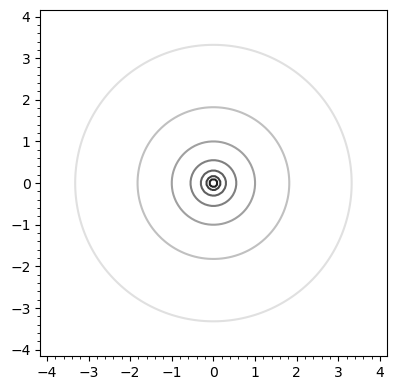

In [104]:
def G(c,x,y): #Returns G(z) for the Julia set for f_c where z = x+ iy
    N = 30 # how far we iterate if we stay reasonably close to 0
    fz = (x,y)
    (cr,ci) = (c.real(), c.imag())
    fc = lambda x,y : (x^2 -y^2 + cr, 2*x*y + ci)
    i = 0
    while i < N and fz[0]^2 + fz[1]^2 <1e+300:
        i += 1
        fz = fc(fz[0],fz[1])
    return log(sqrt(fz[0]^2 + fz[1]^2))/2^i
c = -0.122 + 0.7449*I
x,y = var('x,y')
contour_plot(G(c, x,y), (x,-4,4), (y,-4,4), fill = False)

As you can see, this doesn't give a "spiky" function near the boundary at all. So we'll do the method proposed. We'll actually do a little more work to get the lines to be connected despite our little doubling issue. I'll comment the code explaining why it works, but ask questions if anything isn't clear!

In [254]:
def circle_points(radius = 15, num_points = 40): 
    """
    This function just lists some points on a circle of a given radius
    """
    return [radius*exp(I*2*pi*k/num_points) for k in range(num_points + 1)]

def back_iterates(L,c, tolerance = 0.01):
    """
    returns all points z such that z^2_+ c is in L
    uses that f_c^{-1}(t) = sqrt(t - c). 
    
    Also we remove points in the resulting list so that no two points are closer than tolerance away from eachother
    """
    out1 = []
    for l in L:
        lminusc = CDF(l - c)
        out1 += lminusc.sqrt(all = True)
    out2 = []
    for o in out1:
        if not any(abs(z - o) < tolerance for z in out2):
            out2.append(o)
    return out2    

def curves(L, tolerance = 0.3):
    """
    For a list L of points, (i.e. actually complex numbers) returns a list of lists
    [L1, L2, ...]
    where each list Li has the property that nearby points in Li are close to eachother, and that points in 
    Li are far away from from Lj if i != j, where close means closer than tolerance, and far away means not close
    """
    out = []
    new = [L[0]]
    pt = new[0]
    L = L[1:]
    while L != []:
        with_distances = [(l, abs(pt - l)) for l in L]
        distances = [d for (l,d) in with_distances]
        L = [l for (l,d) in  with_distances]
        if len(L) == 0:
            break
        min_distance = min(distances)
        closest_index = distances.index(min_distance)
        if min_distance > tolerance:
            out.append(new)
            new = [L[0]]
            pt = new[0]
            L = L[1:]
        else:
            pt = L[closest_index]
            new = new  + [pt]
            L = L[:closest_index] + L[closest_index+1 :]
    out.append(new)
    return out

def back_iterates_n(L, c, n , tolerance = 0.01):
    """
    Returns a list of lists [L1, ... , Ln]
    which are the first n back iterates of L under f_c
    """
    iterate_list = [L]
    for i in range(n + 1):
        iterate_list.append(back_iterates(iterate_list[-1], c, tolerance = tolerance))
    return iterate_list[1:]

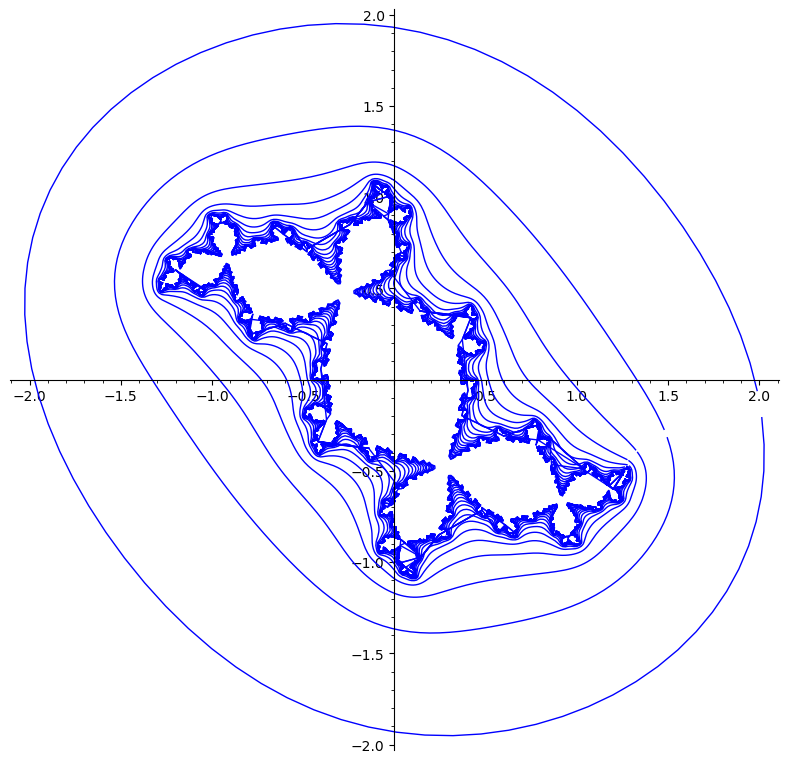

In [256]:
L = circle_points(num_points = 20)
c = -0.122 + 0.7449*I
z = var('z')


back = back_iterates_n(L, c, 25, tolerance = 0.01)[1:]
cs = [c for b in back for c in curves(b)]
level_plots = [list_plot(a,plotjoined = True) for a in cs]
show(sum(level_plots), figsize = [8,8], aspect_ratio = 1)

Great! We now have the images of these circles. Let's finish the problem and study the case that $c \not \in M$. Here it turns out that the same pattern hols almost exactly until the inverse image of a large-radius circle hits the critical point $z = 0$ at whcih point its back iterates split into a *pair* of curves, and the back iterate of each of these curves is again a *pair* of curves, so we get a strange doubling phenomenon. Let's plot an example with $c = -0.78 + 0.25i$. 

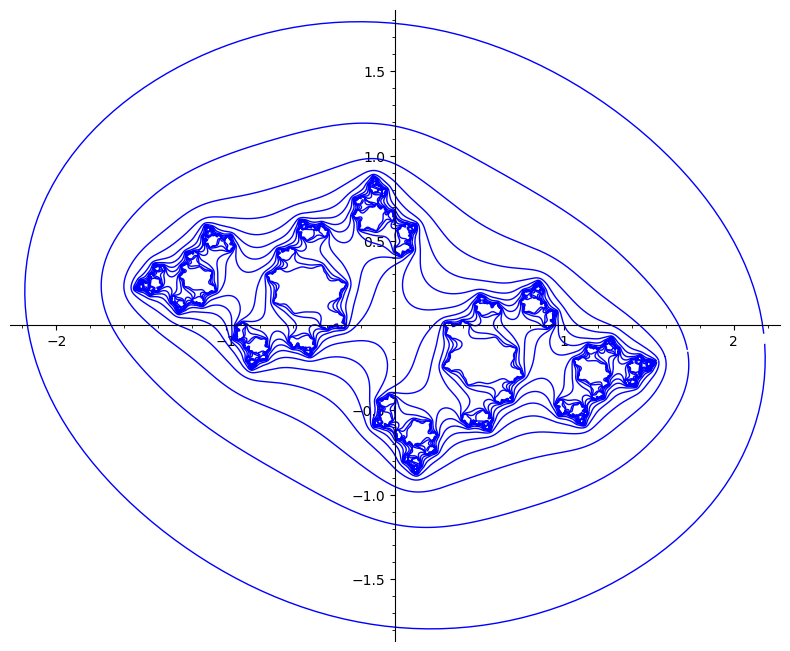

In [263]:
L = circle_points(num_points = 40)
c = -0.78 + 0.44*I
z = var('z')


back = back_iterates_n(L, c, 14, tolerance = 0.005)[1:]
cs = [c for b in back for c in curves(b, tolerance = 0.1)]
level_plots = [list_plot(a,plotjoined = True) for a in cs]
show(sum(level_plots), figsize = [8,8], aspect_ratio = 1)

So we can see that the curves have separates into smaller curves. Let's fine tune the radius of our starting circle to get to a value such that one of the backiterated circles themselves hits the critical point $z = 0$. We can see that this circle develops a pinch, as do *both of its inverse images*. This shows that the Julia set must be wildly disconnected! We can find the radius to start with by finding $r(f^n(0))$ for some $n$.  For some reason the graphics program actually doesn't really plot the critical points and its inverse images, but this actually makes them quite noticeable. 

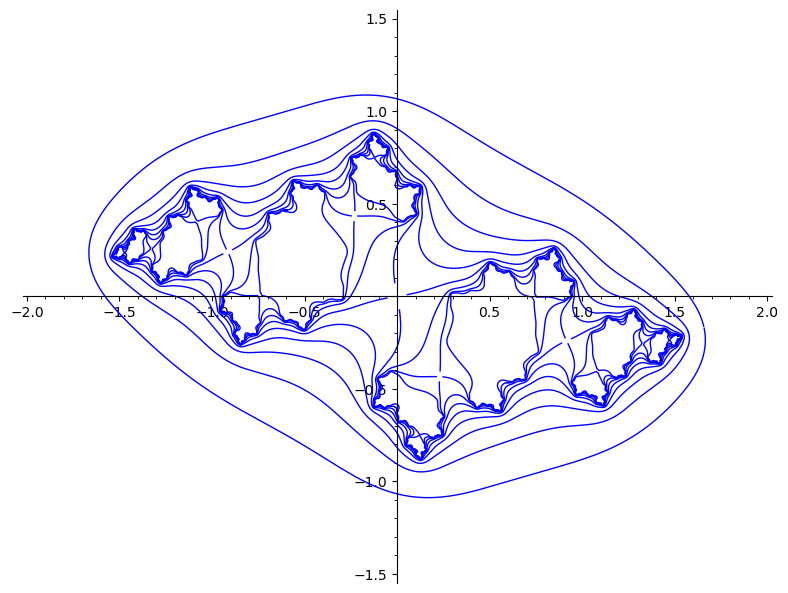

In [277]:
c = -0.78 + 0.44*I
z = var('z')

f(z) = z^2 + c
r = sqrt(abs(f(f(f(f(f(f(f(f(f(0)))))))))))
L = circle_points(radius = r, num_points = 60)

back = back_iterates_n(L, c, 10, tolerance = 0.003)[1:]
cs = [c for b in back for c in curves(b, tolerance = 0.03)]
level_plots = [list_plot(a,plotjoined = True) for a in cs]
show(sum(level_plots), figsize = [8,8], aspect_ratio = 1)

----
# Problem 3

Modify the square example of the [Riemann map](https://doc.sagemath.org/html/en/reference/calculus/sage/calculus/riemann.html) in the documentation to find the Riemann map for some complicated polygon of your choice, maybe a star-shape with some number of points? 